In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# JSON 파일 경로
json_dir = r"한국인 피부상태 측정 데이터/데이터/Training/02.라벨링데이터/3. 스마트폰"

# 이미지 파일 경로
image_dir = r"한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰"

# 데이터를 저장할 리스트
data = []

# JSON 파일 탐색
for root, _, files in os.walk(json_dir):
    for file_name in files:
        if file_name.endswith('.json'):  # JSON 파일만 처리
            file_path = os.path.join(root, file_name)
            
            # JSON 파일 읽기
            with open(file_path, 'r', encoding='utf-8') as f:
                json_data = json.load(f)
            
            # 필요한 정보만 추출
            info = json_data.get('info', {})
            images = json_data.get('images', {})
            annotations = json_data.get('annotations', {})
            equipment = json_data.get('equipment', {})

            if equipment is None:
                equipment = {}

            # 추출한 정보를 하나의 딕셔너리로 저장
            data.append({
                'filename': file_name.split('.')[0],
                'id': info.get('id'),
                'gender': info.get('gender'),
                'age': info.get('age'),
                'date': info.get('date'),
                'skin_type': info.get('skin_type'),
                'sensitive': info.get('sensitive'),
                'device': images.get('device'),
                'angle': images.get('angle'),
                'facepart': images.get('facepart'),
                'bbox': images.get('bbox'),
                'acne': annotations.get('acne'),
                'pigmentation_count': equipment.get('pigmentation_count', 0)
            })

# 리스트를 DataFrame으로 변환
df = pd.DataFrame(data)

# 이미지 경로 리스트 생성
image_paths = []
for root, _, files in os.walk(image_dir):
    for file_name in files:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # 이미지 파일만 처리
            image_paths.append(os.path.join(root, file_name))

# 이미지 경로 DataFrame 생성
image_df = pd.DataFrame({
    'image_path': image_paths
})

# 이미지 파일명에서 번호 추출
image_df['image_number'] = image_df['image_path'].apply(lambda x: os.path.basename(x).split('_')[0])

# JSON 파일명에서 번호 추출
df['filename_number'] = df['filename'].apply(lambda x: x.split('_')[0])

# 두 DataFrame 매핑
df = pd.merge(df, image_df, left_on='filename_number', right_on='image_number', how='left')

# 최종 결과 확인
df

,filename,id,gender,age,date,skin_type,sensitive,device,angle,facepart,bbox,acne,pigmentation_count,filename_number,image_path,image_number
0,0006_03_F_00,0006,F,55,2023-07-27,1,0,2,0,0,"[0, 0, 600, 800]",None,90,0006,한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...,0006
1,0006_03_F_01,0006,F,55,2023-07-27,1,0,2,0,1,"[172, 182, 409, 282]",None,0,0006,한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...,0006
2,0006_03_F_02,0006,F,55,2023-07-27,1,0,2,0,2,"[259, 284, 322, 360]",None,0,0006,한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...,0006
3,0006_03_F_03,0006,F,55,2023-07-27,1,0,2,0,3,"[124, 348, 158, 426]",None,0,0006,한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...,0006
4,0006_03_F_04,0006,F,55,2023-07-27,1,0,2,0,4,"[447, 326, 464, 415]",None,0,0006,한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...,0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,1100_03_F_04,1100,F,28,2023-10-17,1,1,2,0,4,"[1533, 985, 1685, 1336]",None,0,1100,한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...,1100
5801,1100_03_F_05,1100,F,28,2023-10-17,1,1,2,0,5,"[335, 1272, 795, 1809]",None,0,1100,한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...,1100
5802,1100_03_F_06,1100,F,28,2023-10-17,1,1,2,0,6,"[1189, 1279, 1597, 1818]",None,0,1100,한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...,1100
5803,1100_03_F_07,1100,F,28,2023-10-17,1,1,2,0,7,"[732, 1853, 1272, 2067]",None,0,1100,한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...,1100


In [3]:
# 1. age, skin_type, sensitive 열을 먼저 보존
df_grouped = df[['id', 'age', 'skin_type', 'image_path']].drop_duplicates()

# 2. facepart별 bbox 열을 pivot을 통해 분리
df_bboxes = df.pivot(index='id', columns='facepart', values='bbox')

# 3. bbox 값에서 xmin, ymin, xmax, ymax를 분리하여 새로운 열 생성
for i in range(9):  # 0부터 8까지 facepart
    if i in df_bboxes.columns:
        df_bboxes[f'facepart_{i}_xmin'] = df_bboxes[i].apply(lambda x: x[0] if isinstance(x, list) else None)
        df_bboxes[f'facepart_{i}_ymin'] = df_bboxes[i].apply(lambda x: x[1] if isinstance(x, list) else None)
        df_bboxes[f'facepart_{i}_xmax'] = df_bboxes[i].apply(lambda x: x[2] if isinstance(x, list) else None)
        df_bboxes[f'facepart_{i}_ymax'] = df_bboxes[i].apply(lambda x: x[3] if isinstance(x, list) else None)

# 4. 불필요한 facepart 열 삭제
df_bboxes = df_bboxes.drop(columns=[i for i in range(9) if i in df_bboxes.columns])

# 5. age, skin_type, sensitive 열을 다시 결합
df_final = pd.merge(df_bboxes, df_grouped, on='id', how='left')

# 6. 최종 데이터프레임 확인
print(df_final)

       id  facepart_0_xmin  facepart_0_ymin  facepart_0_xmax  facepart_0_ymax  \
0    0006                0                0              600              800   
1    0007                0                0             1920             2560   
2    0008                0                0              768             1024   
3    0010                0                0             1919             2560   
4    0011                0                0             1919             2560   
..    ...              ...              ...              ...              ...   
640  1096                0                0             2316             3088   
641  1097                0                0             2316             3088   
642  1098                0                0             2316             3088   
643  1099                0                0             2316             3088   
644  1100                0                0             2080             2784   

     facepart_1_xmin  facep

# EDA

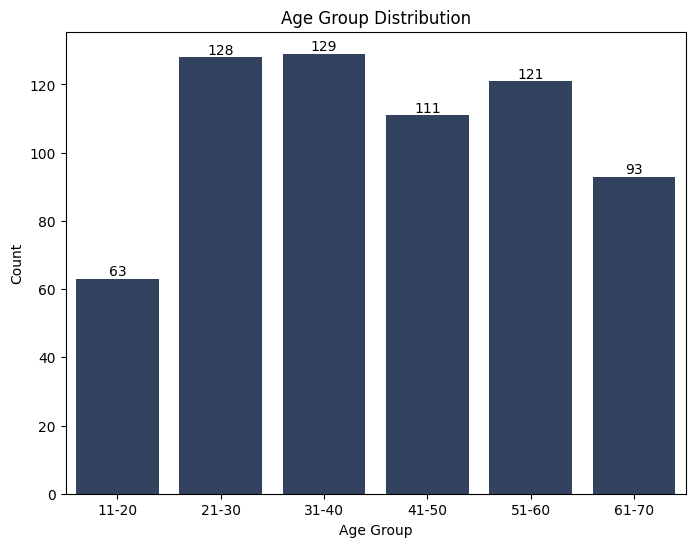

C:\Users\poi80\AppData\Local\Temp\ipykernel_10212\2059294349.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=skin_type_counts.index, y=skin_type_counts.values, palette=['#2B4066'])
C:\Users\poi80\AppData\Local\Temp\ipykernel_10212\2059294349.py:27: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  bar = sns.barplot(x=skin_type_counts.index, y=skin_type_counts.values, palette=['#2B4066'])


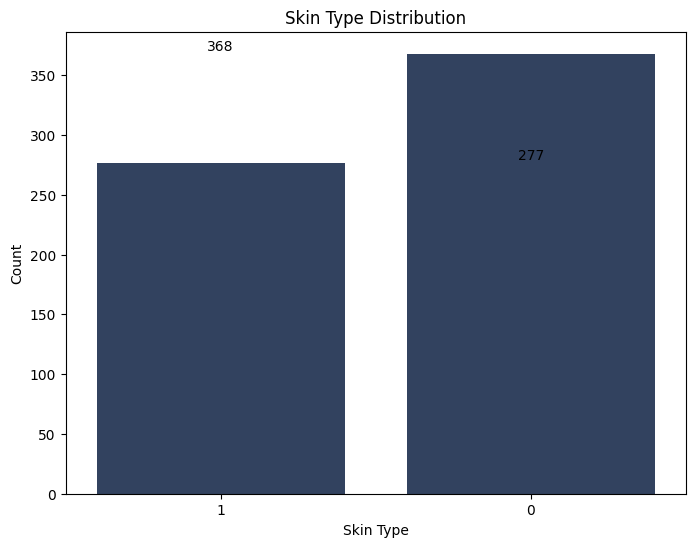

In [4]:
# 나이대 설정
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70']
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False)

# 나이대별 수량 계산
age_group_counts = df_final['age_group'].value_counts().sort_index()

# 나이대별 히스토그램
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, color='#2B4066')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

# 수량 표시
for index, value in enumerate(age_group_counts.values):
    plt.text(index, value, int(value), ha='center', va='bottom') 

plt.show()

# 피부 타입별 바 그래프
plt.figure(figsize=(8, 6))
skin_type_counts = df_final['skin_type'].value_counts()

# 바 그래프 그리기
bar = sns.barplot(x=skin_type_counts.index, y=skin_type_counts.values, palette=['#2B4066'])
plt.title('Skin Type Distribution')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.xticks(ticks=range(len(skin_type_counts.index)), labels=skin_type_counts.index, rotation=0)

# 수량 표시
for index, value in enumerate(skin_type_counts.values):
    plt.text(index, value, int(value), ha='center', va='bottom') 

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 이미지 로딩 및 전처리 함수
def load_and_preprocess_image(image_path, xmin, ymin, xmax, ymax, target_size=(224, 224)):
    img = Image.open(image_path)  # 이미지 로드
    img_cropped = img.crop((xmin, ymin, xmax, ymax))  # 주어진 좌표로 이미지 자르기
    img_resized = img_cropped.resize(target_size)  # 크기 조정
    img_resized = img_to_array(img_resized) / 255.0  # 이미지를 0~1 사이로 정규화
    return img_resized

# GPU 설정

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from datetime import datetime

print("시작 시간:", datetime.now())

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # 메모리 성장 허용
    except RuntimeError as e:
        print(e)

시작 시간: 2024-12-18 16:58:34.978128


In [7]:
# 샘플 이미지에 예측 결과 표시
def plot_sample_image(image_path, row, model):
    img = Image.open(image_path)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)
    ax.axis('off')

    age_predictions = []
    skin_type_predictions = []
    
    for i in range(9):  # 9개의 얼굴 파트
        xmin = row[f'facepart_{i}_xmin']
        ymin = row[f'facepart_{i}_ymin']
        xmax = row[f'facepart_{i}_xmax']
        ymax = row[f'facepart_{i}_ymax']
        
        # 이미지에 구간 그리기
        ax.plot([xmin, xmax], [ymin, ymin], color='red')  # 상단
        ax.plot([xmin, xmax], [ymax, ymax], color='red')  # 하단
        ax.plot([xmin, xmin], [ymin, ymax], color='red')  # 왼쪽
        ax.plot([xmax, xmax], [ymin, ymax], color='red')  # 오른쪽
        
        # 이미지 로드 및 예측
        facepart_image = load_and_preprocess_image(row['image_path'], xmin, ymin, xmax, ymax)
        facepart_image = np.expand_dims(facepart_image, axis=0)  # 배치 차원 추가
        age_pred, skin_pred = model.predict(facepart_image)
        age_predictions.append(age_pred[0])  # 나이대 예측 (실수)
        skin_type_predictions.append(int(skin_pred >= 0.5))  # 피부타입 예측 (0 또는 1)
        
        # 각 예측 결과 텍스트로 표시
        ax.text(xmin, ymin - 10, f'{int(age_pred[0])}, {skin_pred[0]:.2f}', color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.7))

    # 9개 얼굴 파트의 예측값 평균
    avg_age = np.mean(age_predictions)
    avg_skin_type = np.mean(skin_type_predictions)

    # 나이대 범주화
    age_labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s']
    predicted_age = age_labels[int(round(avg_age / 10))]  # 나이를 10단위로 범주화
    
    predicted_skin_type = 'dry' if avg_skin_type < 0.5 else 'oily'
    
    ax.text(10, 10, f'Predicted Age: {predicted_age}, Skin Type: {predicted_skin_type}', color='green', fontsize=15, bbox=dict(facecolor='white', alpha=0.7))
    
    plt.show()

In [8]:
print(df_final['image_path'].head())  # 데이터 샘플 확인
print(df_final['image_path'].dtype)  # 데이터 타입 확인

0    한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...
1    한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...
2    한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...
3    한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...
4    한국인 피부상태 측정 데이터/데이터/Training/01.원천데이터/3. 스마트폰\...
Name: image_path, dtype: object
object


# 전처리

In [9]:
from datetime import datetime

print("시작 시간:", datetime.now())


# 데이터 준비 (각 얼굴 부위에 대해 학습 데이터 생성)
X_train = []
y_age_train = []
y_skin_train = []

# 예시로 나이대와 피부타입에 대한 라벨을 생성
for index, row in df_final.iterrows():
    for i in range(9):  # 얼굴 부위에 대한 반복
        image_data = load_and_preprocess_image(row['image_path'], row[f'facepart_{i}_xmin'], row[f'facepart_{i}_ymin'], row[f'facepart_{i}_xmax'], row[f'facepart_{i}_ymax'])
        X_train.append(image_data)
        y_age_train.append(row['age'])
        y_skin_train.append(row['skin_type'])

print("종료 시간:", datetime.now())

시작 시간: 2024-12-18 16:58:35.079128
종료 시간: 2024-12-18 17:01:49.883203


In [10]:
# NumPy 배열로 변환
X_train = np.array(X_train)
y_age_train = np.array(y_age_train)
y_skin_train = np.array(y_skin_train)

In [11]:
print(type(y_age_train), type(y_skin_train))
print(y_age_train.shape, y_skin_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(5805,) (5805,)


# Model

In [12]:
from sklearn.metrics import recall_score, f1_score

from tensorflow.keras import backend as K

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision_value = self.precision.result()
        recall_value = self.recall.result()
        f1_value = 2 * (precision_value * recall_value) / (precision_value + recall_value + K.epsilon())
        return f1_value

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()



# ResNet50 모델을 사용하는 함수
def create_resnet_model(input_shape=(224, 224, 3), num_classes=1):
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    # base_model.trainable = False  # 사전 훈련된 모델의 가중치를 동결
    base_model.trainable = True # 사전 훈련된 모델의 가중치를 미동결

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # 드롭아웃 추가
        layers.Dense(num_classes, activation='sigmoid')  # 이진 분류
    ])
    

        # 손실 함수 및 옵티마이저 설정
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.00001),  # Adam 옵티마이저
        loss='binary_crossentropy',  # binary_crossentropy 손실 함수
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
                 tf.keras.metrics.Recall(name='recall'), # Recall 추가
                 tf.keras.metrics.Precision(name='precision'), # Precision 추가
                 F1Score(name='f1_score')
                 ]  # F1 메트릭 추가
    )
    
    
    return model

In [13]:
# 모델 생성
model = create_resnet_model(input_shape=(224, 224, 3), num_classes=1)

In [14]:
# 모델 학습 (나이와 피부 타입을 동시에 예측)
# model.fit(X_train, [y_age_train, y_skin_train], epochs=5, batch_size=16)
model.fit(X_train, y_skin_train, epochs=10, batch_size=16)

Epoch 1/10
363/363 [==============================] - 48s 111ms/step - loss: 0.7486 - accuracy: 0.5411 - auc: 0.5369 - recall: 0.6534 - precision: 0.5880 - f1_score: 0.6190
Epoch 2/10
  1/363 [..............................] - ETA: 39s - loss: 0.5686 - accuracy: 0.6875 - auc: 0.7833 - recall: 0.9000 - precision: 0.6923 - f1_score: 0.7826

C:\Users\poi80\Anaconda3\envs\ds_study\lib\site-packages\keras\engine\training.py:1841: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


363/363 [==============================] - 40s 110ms/step - loss: 0.6525 - accuracy: 0.6219 - auc: 0.6525 - recall: 0.7361 - precision: 0.6486 - f1_score: 0.6896
Epoch 3/10
363/363 [==============================] - 40s 110ms/step - loss: 0.6039 - accuracy: 0.6661 - auc: 0.7228 - recall: 0.7693 - precision: 0.6846 - f1_score: 0.7245
Epoch 4/10
363/363 [==============================] - 40s 110ms/step - loss: 0.5451 - accuracy: 0.7271 - auc: 0.7945 - recall: 0.8125 - precision: 0.7365 - f1_score: 0.7726
Epoch 5/10
363/363 [==============================] - 40s 110ms/step - loss: 0.4825 - accuracy: 0.7723 - auc: 0.8501 - recall: 0.8249 - precision: 0.7864 - f1_score: 0.8052
Epoch 6/10
363/363 [==============================] - 40s 110ms/step - loss: 0.4323 - accuracy: 0.8009 - auc: 0.8839 - recall: 0.8406 - precision: 0.8159 - f1_score: 0.8281
Epoch 7/10
363/363 [==============================] - 40s 110ms/step - loss: 0.3436 - accuracy: 0.8484 - auc: 0.9315 - recall: 0.8762 - precision:

[0.6189930438995361,
 0.689577043056488,
 0.7244810461997986,
 0.7726097702980042,
 0.8051871061325073,
 0.8280783891677856,
 0.8683422207832336,
 0.9180675148963928,
 0.9352887272834778,
 0.9528400301933289]

In [19]:
loss = round(model.history.history['loss'][9],2)
accuracy = round(model.history.history['accuracy'][9],2)
auc = round(model.history.history['auc'][9],2)
recall = round(model.history.history['recall'][9],2)
precision = round(model.history.history['precision'][9],2)
f1_score = round(model.history.history['f1_score'][9],2)


print(f'loss : {loss}')
print(f'accuracy : {accuracy}')
print(f'auc : {auc}')
print(f'recall : {recall}')
print(f'precision : {precision}')
print(f'f1_score : {f1_score}')


loss : 0.16
accuracy : 0.95
auc : 0.99
recall : 0.95
precision : 0.95
f1_score : 0.95


In [45]:
# JSON 파일 경로
json_dir = r"한국인 피부상태 측정 데이터/데이터/Validation/02.라벨링데이터/3. 스마트폰"

# 이미지 파일 경로
image_dir = r"한국인 피부상태 측정 데이터/데이터/Validation/01.원천데이터/3. 스마트폰"

# 데이터를 저장할 리스트
data = []

# JSON 파일 탐색
for root, _, files in os.walk(json_dir):
    for file_name in files:
        if file_name.endswith('.json'):  # JSON 파일만 처리
            file_path = os.path.join(root, file_name)
            
            # JSON 파일 읽기
            with open(file_path, 'r', encoding='utf-8') as f:
                json_data = json.load(f)
            
            # 필요한 정보만 추출
            info = json_data.get('info', {})
            images = json_data.get('images', {})
            annotations = json_data.get('annotations', {})
            equipment = json_data.get('equipment', {})

            if equipment is None:
                equipment = {}

            # 추출한 정보를 하나의 딕셔너리로 저장
            data.append({
                'filename': file_name.split('.')[0],
                'id': info.get('id'),
                'gender': info.get('gender'),
                'age': info.get('age'),
                'date': info.get('date'),
                'skin_type': info.get('skin_type'),
                'sensitive': info.get('sensitive'),
                'device': images.get('device'),
                'angle': images.get('angle'),
                'facepart': images.get('facepart'),
                'bbox': images.get('bbox'),
                'acne': annotations.get('acne'),
                'pigmentation_count': equipment.get('pigmentation_count', 0)
            })

# 리스트를 DataFrame으로 변환
df = pd.DataFrame(data)

# 이미지 경로 리스트 생성
image_paths = []
for root, _, files in os.walk(image_dir):
    for file_name in files:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # 이미지 파일만 처리
            image_paths.append(os.path.join(root, file_name))

# 이미지 경로 DataFrame 생성
image_df = pd.DataFrame({
    'image_path': image_paths
})

# 이미지 파일명에서 번호 추출
image_df['image_number'] = image_df['image_path'].apply(lambda x: os.path.basename(x).split('_')[0])

# JSON 파일명에서 번호 추출
df['filename_number'] = df['filename'].apply(lambda x: x.split('_')[0])

# 두 DataFrame 매핑
df = pd.merge(df, image_df, left_on='filename_number', right_on='image_number', how='left')

# 최종 결과 확인
df

,filename,id,gender,age,date,skin_type,sensitive,device,angle,facepart,bbox,acne,pigmentation_count,filename_number,image_path,image_number
0,0001_03_F_00,0001,F,55,2023-07-27,1,0,2,0,0,"[0, 0, 1919, 2560]",None,147,0001,한국인 피부상태 측정 데이터/데이터/Validation/01.원천데이터/3. 스마트...,0001
1,0001_03_F_01,0001,F,55,2023-07-27,1,0,2,0,1,"[704, 777, 1253, 965]",None,0,0001,한국인 피부상태 측정 데이터/데이터/Validation/01.원천데이터/3. 스마트...,0001
2,0001_03_F_02,0001,F,55,2023-07-27,1,0,2,0,2,"[930, 956, 1058, 1135]",None,0,0001,한국인 피부상태 측정 데이터/데이터/Validation/01.원천데이터/3. 스마트...,0001
3,0001_03_F_03,0001,F,55,2023-07-27,1,0,2,0,3,"[550, 1061, 663, 1282]",None,0,0001,한국인 피부상태 측정 데이터/데이터/Validation/01.원천데이터/3. 스마트...,0001
4,0001_03_F_04,0001,F,55,2023-07-27,1,0,2,0,4,"[1305, 1058, 1374, 1273]",None,0,0001,한국인 피부상태 측정 데이터/데이터/Validation/01.원천데이터/3. 스마트...,0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,1091_03_F_04,1091,F,28,2023-10-17,0,0,2,0,4,"[1879, 1365, 1996, 1750]",None,0,1091,한국인 피부상태 측정 데이터/데이터/Validation/01.원천데이터/3. 스마트...,1091
770,1091_03_F_05,1091,F,28,2023-10-17,0,0,2,0,5,"[653, 1665, 1024, 2253]",None,0,1091,한국인 피부상태 측정 데이터/데이터/Validation/01.원천데이터/3. 스마트...,1091
771,1091_03_F_06,1091,F,28,2023-10-17,0,0,2,0,6,"[1472, 1684, 1834, 2245]",None,0,1091,한국인 피부상태 측정 데이터/데이터/Validation/01.원천데이터/3. 스마트...,1091
772,1091_03_F_07,1091,F,28,2023-10-17,0,0,2,0,7,"[970, 2280, 1505, 2549]",None,0,1091,한국인 피부상태 측정 데이터/데이터/Validation/01.원천데이터/3. 스마트...,1091


In [46]:
# 1. age, skin_type, sensitive 열을 먼저 보존
df_grouped = df[['id', 'age', 'skin_type', 'image_path']].drop_duplicates()

# 2. facepart별 bbox 열을 pivot을 통해 분리
df_bboxes = df.pivot(index='id', columns='facepart', values='bbox')

# 3. bbox 값에서 xmin, ymin, xmax, ymax를 분리하여 새로운 열 생성
for i in range(9):  # 0부터 8까지 facepart
    if i in df_bboxes.columns:
        df_bboxes[f'facepart_{i}_xmin'] = df_bboxes[i].apply(lambda x: x[0] if isinstance(x, list) else None)
        df_bboxes[f'facepart_{i}_ymin'] = df_bboxes[i].apply(lambda x: x[1] if isinstance(x, list) else None)
        df_bboxes[f'facepart_{i}_xmax'] = df_bboxes[i].apply(lambda x: x[2] if isinstance(x, list) else None)
        df_bboxes[f'facepart_{i}_ymax'] = df_bboxes[i].apply(lambda x: x[3] if isinstance(x, list) else None)

# 4. 불필요한 facepart 열 삭제
df_bboxes = df_bboxes.drop(columns=[i for i in range(9) if i in df_bboxes.columns])

# 5. age, skin_type, sensitive 열을 다시 결합
df_final = pd.merge(df_bboxes, df_grouped, on='id', how='left')

# 6. 최종 데이터프레임 확인
print(df_final)

      id  facepart_0_xmin  facepart_0_ymin  facepart_0_xmax  facepart_0_ymax  \
0   0001                0                0             1919             2560   
1   0004                0                0              600              800   
2   0013                0                0             1980             2640   
3   0021                0                0             1920             2560   
4   0050                0                0             1920             2560   
..   ...              ...              ...              ...              ...   
81  1060                0                0             2544             3392   
82  1065                0                0             2208             2944   
83  1076                0                0             2316             3088   
84  1081                0                0             2316             3088   
85  1091                0                0             2448             3264   

    facepart_1_xmin  facepart_1_ymin  f

In [47]:
from datetime import datetime

print("시작 시간:", datetime.now())


# 데이터 준비 (각 얼굴 부위에 대해 학습 데이터 생성)
X_test = []
y_age_test = []
y_skin_test = []

# 예시로 나이대와 피부타입에 대한 라벨을 생성
for index, row in df_final.iterrows():
    for i in range(9):  # 얼굴 부위에 대한 반복
        image_data = load_and_preprocess_image(row['image_path'], row[f'facepart_{i}_xmin'], row[f'facepart_{i}_ymin'], row[f'facepart_{i}_xmax'], row[f'facepart_{i}_ymax'])
        X_test.append(image_data)
        y_age_test.append(row['age'])
        y_skin_test.append(row['skin_type'])

print("종료 시간:", datetime.now())

시작 시간: 2024-12-18 15:39:12.566886
종료 시간: 2024-12-18 15:39:39.598756


In [48]:
# NumPy 배열로 변환
X_test = np.array(X_test)
y_age_test = np.array(y_age_test)
y_skin_test = np.array(y_skin_test)

In [49]:
print(type(y_age_test), type(y_skin_test))
print(y_age_test.shape, y_skin_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(774,) (774,)


In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 테스트 데이터로 평가
test_loss, test_accuracy, test_auc = model.evaluate(X_test,y_skin_test,batch_size=16)

y_true = y_skin_test
y_pred = model.predict(X_test)

# 이진 분류인 경우, 예측값을 이진값으로 변환
y_pred = (y_pred > 0.5).astype(int)

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC Score: {test_auc:.2f}")

49/49 [==============================] - 2s 36ms/step - loss: 1.2655 - accuracy: 0.5917 - auc: 0.5878
Precision: 0.66
Recall: 0.68
F1 Score: 0.67
AUC Score: 0.59


5805